In [1]:
%matplotlib inline

from movielens import MovieLens
from hybridLinUCB import HybridLinUCB
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 7, 5

In [3]:
ucb = HybridLinUCB(alpha=0.1, dataset=None, max_items=100, allow_selecting_known_arms=True)

data\movielens\ml-100k.zip is already downloaded.
创建评分矩阵，长宽为=(943, 1682)，并且类型为=float64，采自文件 u.data.
正面的评分 (>=4) 记为 1, 负面的评分记为 -1, 不确定的评分记为 0
创建电影种类矩阵，长宽为=(1682, 19)，并且类型为=float64，采自文件 u.item
创建电影名称矩阵，长宽为=(1682,)，并且类型为=object，采自文件 u.item
self.R的统计数据：
用户数量:                 943
实例数量:                 1682
评分条数:                 1586126
已知评分:                 100000
已知正面评分:             55375
已知负面评分:             44625
已知评分占比:             0.06304669364224531
已知正面评分占比:         0.034912106604393346
已知负面评分占比:         0.028134587037851974
用户正面评价均值: 58.72216330858961 +- 54.67211827074995
用户负面评价均值: 47.32237539766702 +- 58.41143787053165
Shrinked rating matrix from (943, 1682) to (56, 100).

After shrinking:
用户数量:                 56
实例数量:                 100
评分条数:                 5600
已知评分:                 903
已知正面评分:             606
已知负面评分:             297
已知评分占比:             0.16125
已知正面评分占比:         0.10821428571428572
已知负面评分占比:         0.05303571428571428
用户正面评价均值: 10.821428571428571 +- 11.9180342

In [4]:
print('R:\n', ucb.dataset.R)

R:
 [[ 1. -1.  1. ...  1. -1.  1.]
 [ 1.  0.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 1.  0.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 1.  0.  0. ...  1.  0.  0.]]


In [5]:
avg_reward = ucb.run(num_epochs=50)

Finished epoch 0/50 with avg reward 0.17857142857142858 in 21.69882297515869s
Finished epoch 1/50 with avg reward 0.25 in 19.908498525619507s
Finished epoch 2/50 with avg reward 0.39285714285714285 in 19.984667539596558s
Finished epoch 3/50 with avg reward 0.5178571428571429 in 24.090785264968872s
Finished epoch 4/50 with avg reward 0.5357142857142857 in 20.955758571624756s
Finished epoch 5/50 with avg reward 0.5892857142857143 in 24.633846759796143s
Finished epoch 6/50 with avg reward 0.6428571428571429 in 53.60147523880005s
Finished epoch 7/50 with avg reward 0.6785714285714286 in 25.152983903884888s
Finished epoch 8/50 with avg reward 0.6428571428571429 in 23.066739082336426s
Finished epoch 9/50 with avg reward 0.6428571428571429 in 21.641982793807983s
Finished epoch 10/50 with avg reward 0.7142857142857143 in 21.077475786209106s
Finished epoch 11/50 with avg reward 0.6964285714285714 in 19.788899421691895s
Finished epoch 12/50 with avg reward 0.7321428571428571 in 19.16937708854675

Text(0.5, 1.0, 'HybridLinUCB: Fixed rewards')

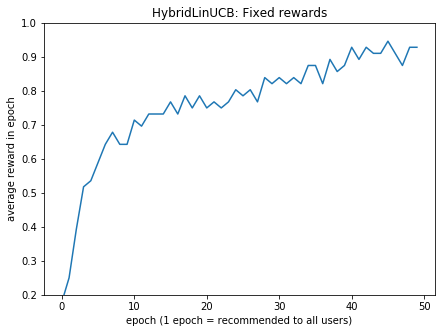

In [6]:
plt.plot(range(len(avg_reward)), avg_reward)
plt.ylabel('average reward in epoch')
plt.ylim(0.2, 1)
plt.xlabel('epoch (1 epoch = recommended to all users)')
plt.title('HybridLinUCB: Fixed rewards')

In [7]:
ucb_stochastic = HybridLinUCB(alpha=0.1, dataset=None, max_items=100, 
                        allow_selecting_known_arms=True, fixed_rewards=False, prob_reward_p=0.9)

data\movielens\ml-100k.zip is already downloaded.
创建评分矩阵，长宽为=(943, 1682)，并且类型为=float64，采自文件 u.data.
正面的评分 (>=4) 记为 1, 负面的评分记为 -1, 不确定的评分记为 0
创建电影种类矩阵，长宽为=(1682, 19)，并且类型为=float64，采自文件 u.item
创建电影名称矩阵，长宽为=(1682,)，并且类型为=object，采自文件 u.item
self.R的统计数据：
用户数量:                 943
实例数量:                 1682
评分条数:                 1586126
已知评分:                 100000
已知正面评分:             55375
已知负面评分:             44625
已知评分占比:             0.06304669364224531
已知正面评分占比:         0.034912106604393346
已知负面评分占比:         0.028134587037851974
用户正面评价均值: 58.72216330858961 +- 54.67211827074995
用户负面评价均值: 47.32237539766702 +- 58.41143787053165
Shrinked rating matrix from (943, 1682) to (56, 100).

After shrinking:
用户数量:                 56
实例数量:                 100
评分条数:                 5600
已知评分:                 903
已知正面评分:             606
已知负面评分:             297
已知评分占比:             0.16125
已知正面评分占比:         0.10821428571428572
已知负面评分占比:         0.05303571428571428
用户正面评价均值: 10.821428571428571 +- 11.9180342

In [8]:
print('R:\n', ucb_stochastic.dataset.R)

R:
 [[ 1. -1.  1. ...  1. -1.  1.]
 [ 1.  0.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 1.  0.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 1.  0.  0. ...  1.  0.  0.]]


In [9]:
avg_reward_stochastic = ucb_stochastic.run(num_epochs=50)

Finished epoch 0/50 with avg reward 0.30357142857142855 in 20.690044403076172s
Finished epoch 1/50 with avg reward 0.5535714285714286 in 21.015815258026123s
Finished epoch 2/50 with avg reward 0.48214285714285715 in 20.202738761901855s
Finished epoch 3/50 with avg reward 0.5714285714285714 in 19.413877964019775s
Finished epoch 4/50 with avg reward 0.5714285714285714 in 19.439030170440674s
Finished epoch 5/50 with avg reward 0.5714285714285714 in 19.419114589691162s
Finished epoch 6/50 with avg reward 0.5714285714285714 in 20.05336618423462s
Finished epoch 7/50 with avg reward 0.6428571428571429 in 19.453978061676025s
Finished epoch 8/50 with avg reward 0.6071428571428571 in 19.35926604270935s
Finished epoch 9/50 with avg reward 0.6071428571428571 in 19.670190811157227s
Finished epoch 10/50 with avg reward 0.6607142857142857 in 20.355245113372803s
Finished epoch 11/50 with avg reward 0.6607142857142857 in 19.986608505249023s
Finished epoch 12/50 with avg reward 0.6964285714285714 in 20.

Text(0.5, 1.0, 'HybridLinUCB: Stochastic rewards with p=0.9')

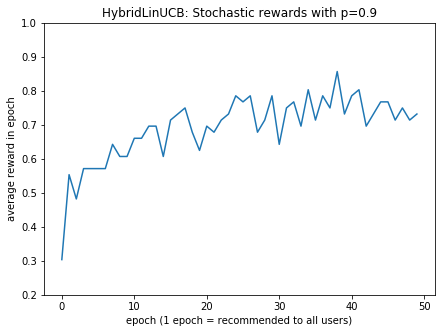

In [10]:
plt.plot(range(len(avg_reward_stochastic)), avg_reward_stochastic)
plt.ylabel('average reward in epoch')
plt.ylim(0.2, 1)
plt.xlabel('epoch (1 epoch = recommended to all users)')
plt.title('HybridLinUCB: Stochastic rewards with p=0.9')

In [11]:
ucb_stochastic_100 = HybridLinUCB(alpha=0.1, dataset=None, max_items=100, 
                        allow_selecting_known_arms=True, fixed_rewards=False, prob_reward_p=0.9)

data\movielens\ml-100k.zip is already downloaded.
创建评分矩阵，长宽为=(943, 1682)，并且类型为=float64，采自文件 u.data.
正面的评分 (>=4) 记为 1, 负面的评分记为 -1, 不确定的评分记为 0
创建电影种类矩阵，长宽为=(1682, 19)，并且类型为=float64，采自文件 u.item
创建电影名称矩阵，长宽为=(1682,)，并且类型为=object，采自文件 u.item
self.R的统计数据：
用户数量:                 943
实例数量:                 1682
评分条数:                 1586126
已知评分:                 100000
已知正面评分:             55375
已知负面评分:             44625
已知评分占比:             0.06304669364224531
已知正面评分占比:         0.034912106604393346
已知负面评分占比:         0.028134587037851974
用户正面评价均值: 58.72216330858961 +- 54.67211827074995
用户负面评价均值: 47.32237539766702 +- 58.41143787053165
Shrinked rating matrix from (943, 1682) to (56, 100).

After shrinking:
用户数量:                 56
实例数量:                 100
评分条数:                 5600
已知评分:                 903
已知正面评分:             606
已知负面评分:             297
已知评分占比:             0.16125
已知正面评分占比:         0.10821428571428572
已知负面评分占比:         0.05303571428571428
用户正面评价均值: 10.821428571428571 +- 11.9180342

In [12]:
avg_reward_stochastic_100 = ucb_stochastic_100.run(num_epochs=100)

Finished epoch 0/100 with avg reward 0.30357142857142855 in 20.296379327774048s
Finished epoch 1/100 with avg reward 0.5535714285714286 in 19.26250433921814s
Finished epoch 2/100 with avg reward 0.48214285714285715 in 19.697341442108154s
Finished epoch 3/100 with avg reward 0.5714285714285714 in 19.30776834487915s
Finished epoch 4/100 with avg reward 0.5714285714285714 in 20.073349714279175s
Finished epoch 5/100 with avg reward 0.5714285714285714 in 18.977267503738403s
Finished epoch 6/100 with avg reward 0.5714285714285714 in 20.735564708709717s
Finished epoch 7/100 with avg reward 0.6428571428571429 in 20.133177280426025s
Finished epoch 8/100 with avg reward 0.6071428571428571 in 19.960994958877563s
Finished epoch 9/100 with avg reward 0.6071428571428571 in 19.29883909225464s
Finished epoch 10/100 with avg reward 0.6607142857142857 in 21.92341685295105s
Finished epoch 11/100 with avg reward 0.6607142857142857 in 20.804958820343018s
Finished epoch 12/100 with avg reward 0.696428571428

Text(0.5, 1.0, 'HybridLinUCB: Stochastic rewards with p=0.9')

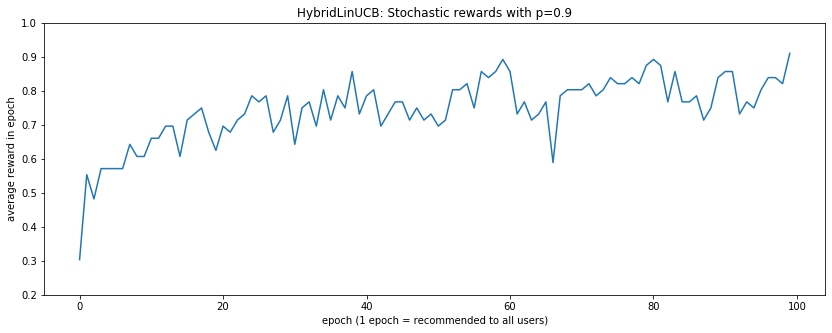

In [13]:
rcParams['figure.figsize'] = 14, 5
plt.plot(range(len(avg_reward_stochastic_100)), avg_reward_stochastic_100)
plt.ylabel('average reward in epoch')
plt.ylim(0.2, 1)
plt.xlabel('epoch (1 epoch = recommended to all users)')
plt.title('HybridLinUCB: Stochastic rewards with p=0.9')